In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans as km
import seaborn as sns

In [4]:
raw_data_file = './ufodata.csv'
print("Reading raw data from {}".format(raw_data_file))

Reading raw data from ./ufodata.csv


In [6]:
ufodf = pd.read_csv(raw_data_file)

In [11]:
#original dataframe
ufodf

,reportedTimestamp,eventDate,eventTime,shape,duration,witnesses,weather,firstName,lastName,latitude,longitude,sighting,physicalEvidence,contact,researchOutcome
0,1977-04-04T04:02:23.340Z,1977-03-31,23:46,circle,4,1,rain,Ila,Bashirian,47.329444,-122.578889,Y,N,N,explained
1,1982-11-22T02:06:32.019Z,1982-11-15,22:04,disk,4,1,partly cloudy,Eriberto,Runolfsson,52.664913,-1.034894,Y,Y,N,explained
2,1992-12-07T19:06:52.482Z,1992-12-07,19:01,circle,49,1,clear,Miller,Watsica,38.951667,-92.333889,Y,N,N,explained
3,2011-02-24T21:06:34.898Z,2011-02-21,20:56,disk,13,1,partly cloudy,Clifton,Bechtelar,41.496944,-71.367778,Y,N,N,explained
4,1991-03-09T16:18:45.501Z,1991-03-09,11:42,circle,17,1,mostly cloudy,Jayda,Ebert,47.606389,-122.330833,Y,N,N,explained
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,2019-01-18T14:41:45.346Z,2019-01-14,07:25,square,95,10,snow,Taryn,Osinski,42.033333,-87.733333,Y,N,N,unexplained
17996,2016-09-20T23:24:30.488Z,2016-09-14,13:27,circle,55,10,stormy,Derick,Pouros,43.004444,-71.348889,Y,N,N,explained
17997,1977-03-10T13:48:27.305Z,1977-03-06,21:59,circle,39,10,partly cloudy,Judah,Purdy,36.866389,-83.888889,Y,N,N,explained
17998,1971-07-23T13:22:36.190Z,1971-07-18,13:59,square,28,10,snow,Imelda,Botsford,35.385833,-94.398333,Y,N,N,unexplained


In [12]:
#shuffled dataframe, frac=1 makes it return the full set 
ufodf = ufodf.sample(frac=1)
ufodf

,reportedTimestamp,eventDate,eventTime,shape,duration,witnesses,weather,firstName,lastName,latitude,longitude,sighting,physicalEvidence,contact,researchOutcome
119,2002-11-22T17:03:13.813Z,2002-11-20,23:43,circle,63,1,rain,Minerva,Homenick,44.875556,-91.919167,Y,N,N,explained
8598,2000-05-25T10:42:01.481Z,2000-05-23,10:01,triangle,26,5,fog,Markus,Marvin,43.801389,-91.239444,Y,N,N,probable
5130,1995-10-15T10:21:07.230Z,1995-10-11,13:39,circle,46,3,partly cloudy,Ola,Gerhold,30.788072,-91.376848,Y,N,N,explained
13200,2006-11-05T04:03:26.504Z,2006-11-02,10:28,disk,25,8,mostly cloudy,Bernice,Leuschke,32.250278,-101.478333,Y,N,N,explained
17828,1985-05-10T01:57:01.602Z,1985-05-07,21:44,circle,26,10,stormy,Flo,Towne,39.029722,-84.366389,Y,Y,N,explained
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,2002-03-06T07:26:36.839Z,2002-03-03,21:58,light,33,4,stormy,Zaria,Stoltenberg,46.823102,-92.224844,Y,N,N,unexplained
9182,2000-08-09T21:28:58.244Z,2000-08-09,13:39,square,78,6,mostly cloudy,Kenton,Grady,34.216389,-119.036667,Y,Y,Y,probable
1130,1992-01-02T21:02:00.998Z,1991-12-30,22:23,circle,66,1,fog,Lafayette,Botsford,33.119167,-117.085556,Y,N,N,explained
8754,1998-09-08T04:25:52.786Z,1998-09-02,22:56,disk,80,5,stormy,Alden,Weissnat,39.290278,-76.612500,Y,N,N,explained


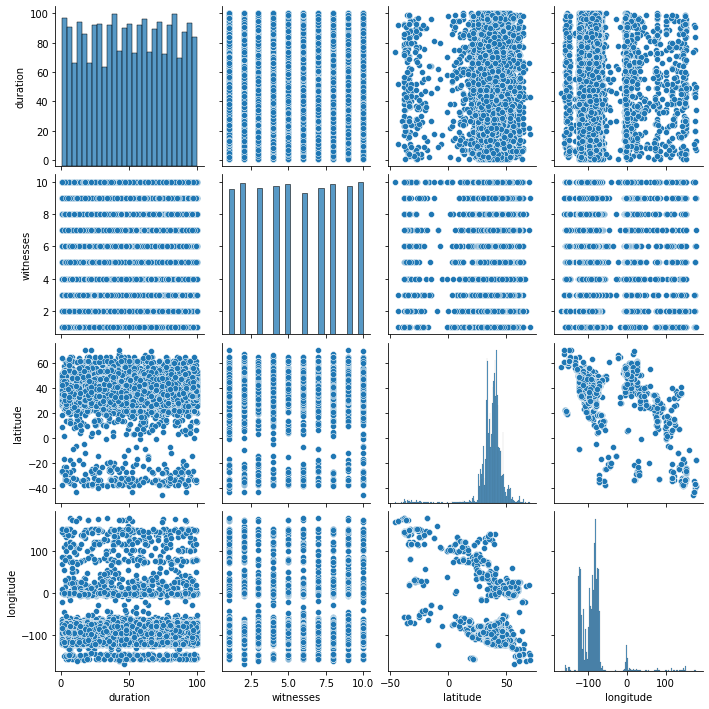

In [16]:
#Visualize correlation between existing data
sns.pairplot(ufodf)

In [50]:
# Data including only longitude and latitude
ufodf[['latitude','longitude']]

,latitude,longitude
119,44.875556,-91.919167
8598,43.801389,-91.239444
5130,30.788072,-91.376848
13200,32.250278,-101.478333
17828,39.029722,-84.366389
...,...,...
5819,46.823102,-92.224844
9182,34.216389,-119.036667
1130,33.119167,-117.085556
8754,39.290278,-76.612500


In [17]:
kmeans = km(n_clusters=10)

In [46]:
prediction = kmeans.fit(ufodf[['latitude','longitude']])
prediction.cluster_centers_

array([[  47.81538457, -122.57395359],
       [  19.35627133,   90.99343136],
       [  41.20795792,  -74.81205297],
       [ -31.46928425,  146.28814842],
       [  51.24187103,    2.43625918],
       [  36.57497663,  -97.67121224],
       [  35.69663648, -117.30318445],
       [  36.12260442,  -84.42766886],
       [ -25.2998759 ,  -17.7165992 ],
       [  23.05248399, -157.96521164]])

In [47]:
count = 1
for c in prediction.cluster_centers_:
    print("Centroid {} is located at lng:{} and lat:{} ".format(count,c[0],c[1]))
    count += 1

Centroid 1 is located at lng:47.815384565803335 and lat:-122.57395358909092 
Centroid 2 is located at lng:19.356271327868857 and lat:90.99343136065576 
Centroid 3 is located at lng:41.20795792052353 and lat:-74.81205296775272 
Centroid 4 is located at lng:-31.469284245283028 and lat:146.28814841509435 
Centroid 5 is located at lng:51.24187102753623 and lat:2.4362591753623235 
Centroid 6 is located at lng:36.57497662964924 and lat:-97.6712122407346 
Centroid 7 is located at lng:35.6966364792005 and lat:-117.3031844527483 
Centroid 8 is located at lng:36.122604418521945 and lat:-84.42766885515836 
Centroid 9 is located at lng:-25.299875897959176 and lat:-17.716599204081646 
Centroid 10 is located at lng:23.05248398636364 and lat:-157.9652116409091 


In [48]:
X = [i for i,j in prediction.cluster_centers_]
Y = [j for i,j in prediction.cluster_centers_]

Text(0, 0.5, 'Longitude')

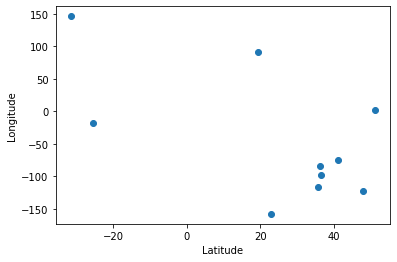

In [49]:
plt.scatter(X,Y)
plt.xlabel("Latitude")
plt.ylabel("Longitude")